# Loan Prediction

## Introduction

### Business Objective

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Data Understanding

The dataset resembles a real-world dataset and has many of the same challenges. It has:
Missing values
Spelling differences
Punctuation format
Duplicates rows

### Data Preparation

Split your data into training and testing
Start with Exploratory data analysis
Data cleaning
Handling the missing values
Transform categorical data into numeric
Feature Engineering (such as credit utilization)
The goal is to clean the dataset and get it ready for the Algorithms

### Modeling

### Algorithm Selection

Depending on the question at hand you can decide which algorithm
to choose

### Classification Question

Pick a classification algorithm
Regression based
Tree based
Distance based
Probability based
Model Evaluation
Evaluation criteria

### Modeling:

Pick an algorithm
Train the algorithm using training data
Evaluate the trained model
Use the trained model to predict who is a good customer
on test data
Come up with questions to ask the customer when they
apply for a loan

### Dictionary

The dataset consists of the following fields:
• Loan ID: A unique Identifier for the loan information.
<br>
• Customer ID: A unique identifier for the customer. Customers may have more than one loan.
<br>
• Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
<br>
• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
<br>
• Term: A categorical variable indicating if it is a short term or long term loan.
<br>
• Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
<br>
• Years in current job: A categorical variable indicating how many years the customer has been in their current job.
<br>
• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
<br>
• Annual Income: The customer's annual income
<br>
• Purpose: A description of the purpose of the loan.
<br>
• Monthly Debt: The customer's monthly payment for their existing loans
<br>
• Years of Credit History: The years since the first entry in the customer’s credit history
<br>
• Months since last delinquent: Months since the last loan delinquent payment
<br>
• Number of Open Accounts: The total number of open credit cards
<br>
• Number of Credit Problems: The number of credit problems in the customer records.
<br>
• Current Credit Balance: The current total debt for the customer
<br>
• Maximum Open Credit: The maximum credit limit for all credit sources.
<br>
• Bankruptcies: The number of bankruptcies
<br>
• Tax Liens: The number of tax liens.

## Analyzing the data

### Load the data

In [1]:
import pandas as pd

pd.options.display.float_format = '{:20,.2f}'.format # To prevent scientific notation in long numbers

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')
df.head()

/var/folders/qp/9j67xhhx3z1_9y5zm_dghclw0000gn/T/ipykernel_41232/3709207896.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoansTrainingSet.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,"33,694.00",Debt Consolidation,$584.03,12.30,41.00,10,0,6760,16056,0.00,0.00
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,"42,269.00",other,"$1,106.04",26.30,NaN,17,0,6262,19149,0.00,0.00
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,"90,126.00",Debt Consolidation,"$1,321.85",28.80,NaN,5,0,20967,28335,0.00,0.00
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,"38,072.00",Debt Consolidation,$751.92,26.20,NaN,9,0,22529,43915,0.00,0.00
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,"50,025.00",Debt Consolidation,$355.18,11.50,NaN,12,0,17391,37081,0.00,0.00


### Get rid of the duplicates

In [3]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

### EDA#

In [4]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
146906,9209a0c5-cd92-4d86-9075-e7ee6407d8c6,9dcef2f4-a7ce-4719-8c80-a52f13075173,Fully Paid,9149,Short Term,742.00,10+ years,Own Home,"50,825.00",Debt Consolidation,$893.68,20.50,NaN,11,0,8766,23376,0.00,0.00
137860,8937c0d3-01ed-46b7-90c5-21e9bd05c9c9,14cf82ca-79dc-4243-a89b-4e1028b74a6e,Fully Paid,15610,Short Term,744.00,8 years,Home Mortgage,"102,438.00",Home Improvements,"$1,596.33",18.00,NaN,5,0,5785,51198,0.00,0.00
237459,ec49cb91-c054-4926-8285-c4b7fe88480f,fbd788cd-73e8-4071-8905-0fd3ea3812a8,Charged Off,7935,Long Term,713.00,10+ years,Home Mortgage,"63,479.00",Debt Consolidation,"$1,200.81",17.60,48.00,8,0,4983,7859,0.00,0.00
102969,66641e77-6eca-4325-a03f-621fdf722dc8,7292fc1f-fe6a-41ad-a338-d199ae4451bb,Fully Paid,7912,Short Term,733.00,10+ years,Home Mortgage,"89,010.00",Debt Consolidation,$709.85,24.00,22.00,12,0,12478,25007,0.00,0.00
236348,eb20ea7c-feb1-459d-ae4a-4b1516cf66c8,fa4d13cb-3eef-47b9-b124-2c4582110f72,Fully Paid,35627,Long Term,NaN,10+ years,Rent,NaN,Debt Consolidation,"$1,514.97",22.80,74.00,9,1,0,0,1.00,0.00
132797,8426577d-7e46-448b-87c6-4137045785cf,3ecce111-ffa2-4b00-80b2-480ccbf1cd83,Charged Off,4780,Short Term,NaN,3 years,Rent,NaN,Debt Consolidation,$541.39,7.80,NaN,11,0,3385,3486,0.00,0.00
208874,cfe6e1ef-8145-455f-8078-b5b85d839de1,1587f9fc-dfeb-432e-b1d1-bcc63ad3dd34,Fully Paid,18902,Short Term,751.00,10+ years,Home Mortgage,"98,450.00",Debt Consolidation,"$1,419.32",26.00,NaN,24,0,48231,143544,0.00,0.00
176906,afd84c26-6413-4f09-a2ad-8d0324a4fa75,05468947-86e1-4889-926b-a8f4f6b74541,Fully Paid,11813,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$812.13,32.80,11.00,12,0,15543,19094,0.00,0.00
92428,5bed8b83-e113-4266-ad39-df054b267d54,b7d345a3-6298-4bce-94fb-983a29f15b16,Fully Paid,22858,Long Term,711.00,6 years,Rent,"63,837.00",Debt Consolidation,"$1,074.58",8.50,NaN,14,0,10458,27889,0.00,0.00
200726,c7a97fe9-7aaf-4893-8fc4-a84bf52aa773,1091f492-3c9b-46c4-b7ad-d096d1c69873,Fully Paid,20452,Short Term,737.00,5 years,Home Mortgage,"138,051.00",Debt Consolidation,$852.47,17.60,48.00,9,0,11277,16249,0.00,0.00


In [5]:
df.shape

(240374, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  object 
 3   Current Loan Amount           240374 non-null  int64  
 4   Term                          240374 non-null  object 
 5   Credit Score                  181028 non-null  float64
 6   Years in current job          229930 non-null  object 
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 181028 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  object 
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  108947 non-null  fl

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,"240,374.00","14,659,881.83","35,353,839.17",505.00,"8,300.25","14,394.00","24,566.00","99,999,999.00"
Credit Score,"181,028.00","1,236.27","1,737.77",585.00,715.00,734.00,744.00,"7,510.00"
Annual Income,"181,028.00","72,400.27","56,468.08",0.00,"44,555.00","61,505.00","87,057.00","8,713,547.00"
Years of Credit History,"240,374.00",18.31,7.07,3.40,13.50,17.00,21.80,70.50
Months since last delinquent,"108,947.00",34.94,21.84,0.00,16.00,32.00,51.00,176.00
Number of Open Accounts,"240,374.00",11.10,4.98,0.00,8.00,10.00,14.00,76.00
Number of Credit Problems,"240,374.00",0.16,0.46,0.00,0.00,0.00,0.00,11.00
Current Credit Balance,"240,374.00","15,416.92","19,791.32",0.00,"5,962.00","11,057.00","19,316.00","1,731,412.00"
Bankruptcies,"239,882.00",0.11,0.34,0.00,0.00,0.00,0.00,7.00
Tax Liens,"240,351.00",0.03,0.24,0.00,0.00,0.00,0.00,11.00


In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

Lots of empty data here.

In [9]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Visualizations

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

##### Correlation

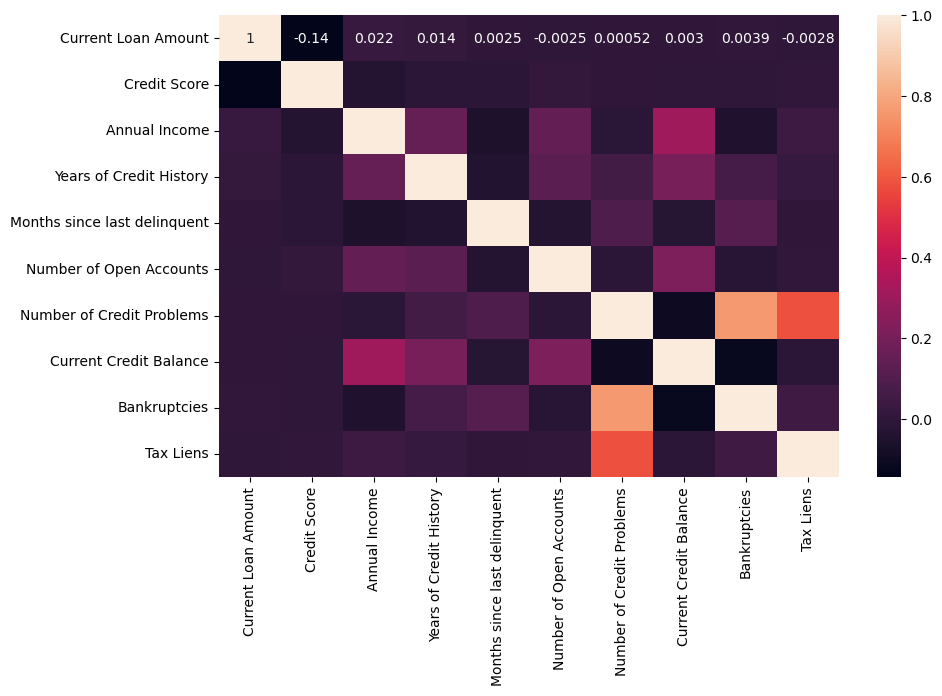

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True);

##### Credit scores

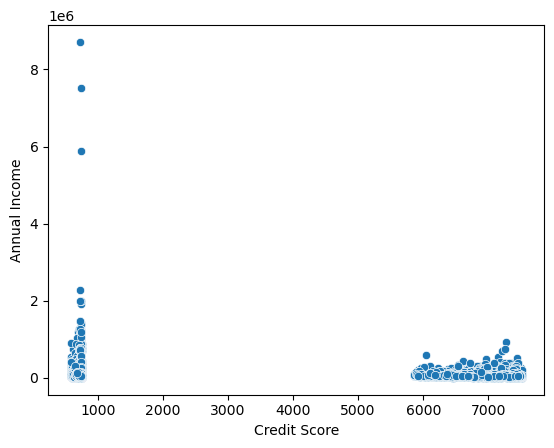

In [12]:
sns.scatterplot(x=df['Credit Score'], y=df['Annual Income'], palette='bright');

##### Home ownership

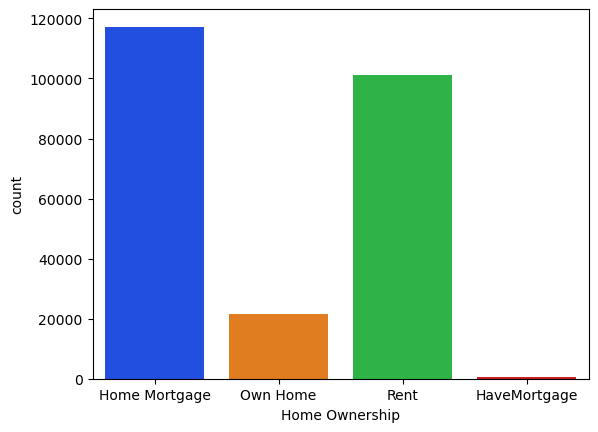

In [13]:
sns.countplot(x=df['Home Ownership'], palette='bright');

##### Loan Status

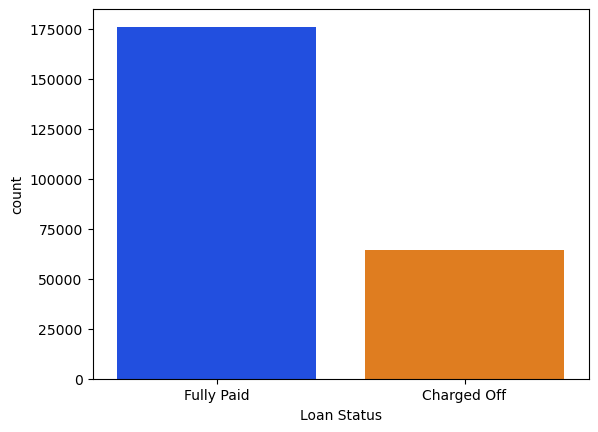

In [14]:
sns.countplot(x=df['Loan Status'], palette='bright');

##### Years in current job

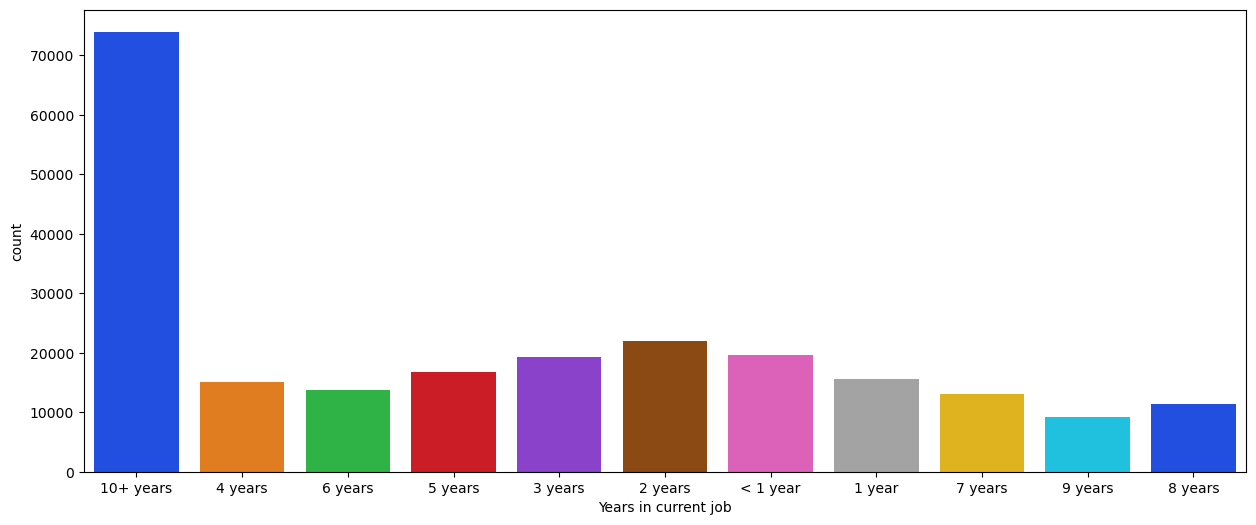

In [15]:
plt.figure(figsize=(15, 6))

sns.countplot(x=df['Years in current job'], palette='bright');

Most people have been employed in their current job for a long while.

##### Term

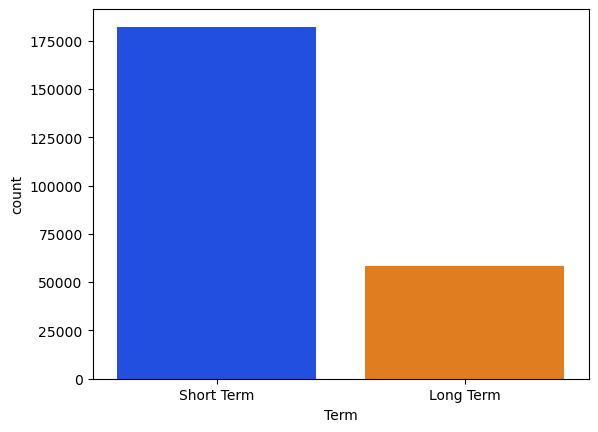

In [16]:
sns.countplot(x=df['Term'], palette='bright');

##### Purpose

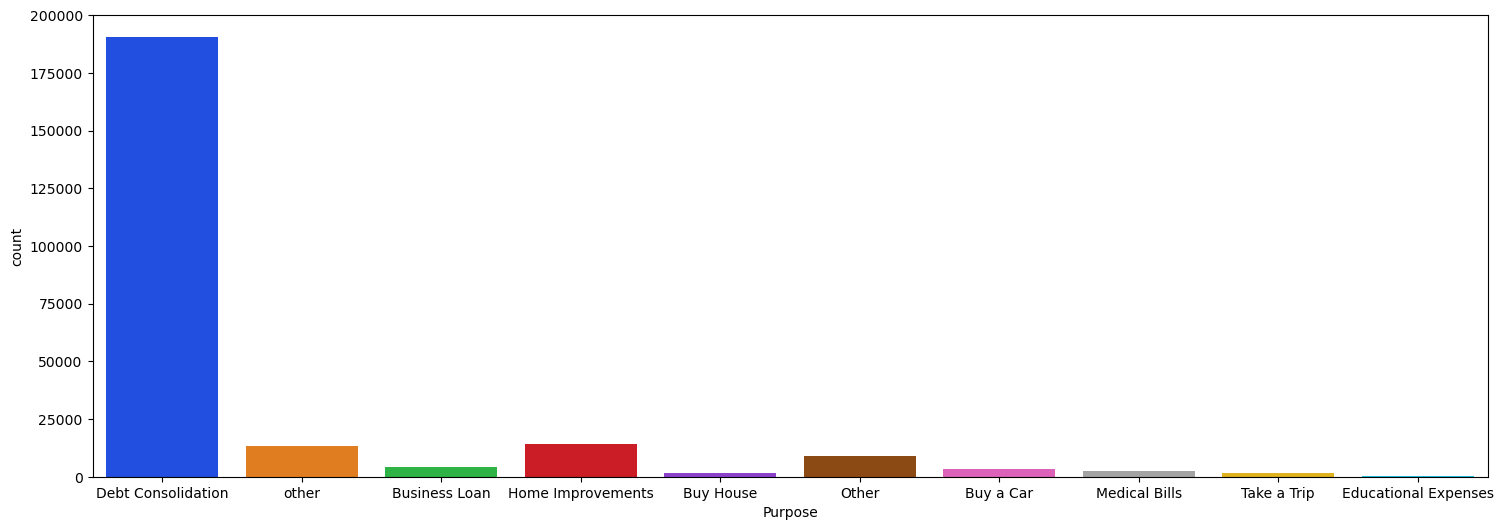

In [17]:
plt.figure(figsize=(18, 6))
sns.countplot(x=df['Purpose'], palette='bright');

Most people are applying for a loan to pay of another debt. Consider asking this before giving the loan.

### Data Cleaning

### Null values

In [18]:
def barplot_nulls(df, figsize=(15, 6), percentage=False, palette='bright'):
    """
        A function that draws a barplot that shows the count or the percentages of the empty values
        in a data frame. It does not show columns with no null values in the graph.
    """
    
    nulls = df.isnull().sum()
    title = f'Null value {"percentages" if percentage else "counts"} of columns with nonzero null values.'
    
    if percentage:
        nulls = (nulls / len(df)) * 100
    
    nulls = nulls[nulls > 0] # Filter the zeros.
    
    nulls_df = nulls.reset_index()
    nulls_df.columns = ['Column', 'Missing Values']
    
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(y=nulls_df['Missing Values'], x=nulls_df['Column'], palette=palette);

In [19]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

Shows the amount of null values in each column. Lets make a graphical representation with the above function.

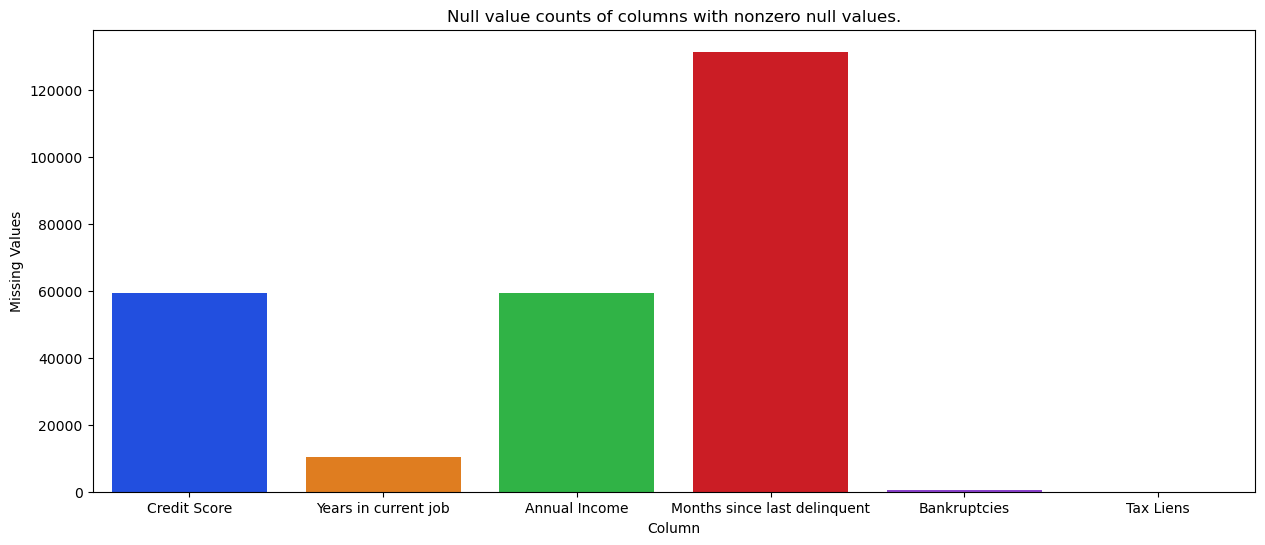

In [20]:
barplot_nulls(df)

In [21]:
(df.isnull().sum() / len(df)) * 100

Loan ID                                        0.00
Customer ID                                    0.00
Loan Status                                    0.00
Current Loan Amount                            0.00
Term                                           0.00
Credit Score                                  24.69
Years in current job                           4.34
Home Ownership                                 0.00
Annual Income                                 24.69
Purpose                                        0.00
Monthly Debt                                   0.00
Years of Credit History                        0.00
Months since last delinquent                  54.68
Number of Open Accounts                        0.00
Number of Credit Problems                      0.00
Current Credit Balance                         0.00
Maximum Open Credit                            0.00
Bankruptcies                                   0.20
Tax Liens                                      0.01
dtype: float

Shows the percentage of the null values. We will drop 'Months since last delinquent' since it has a lot of empty data.

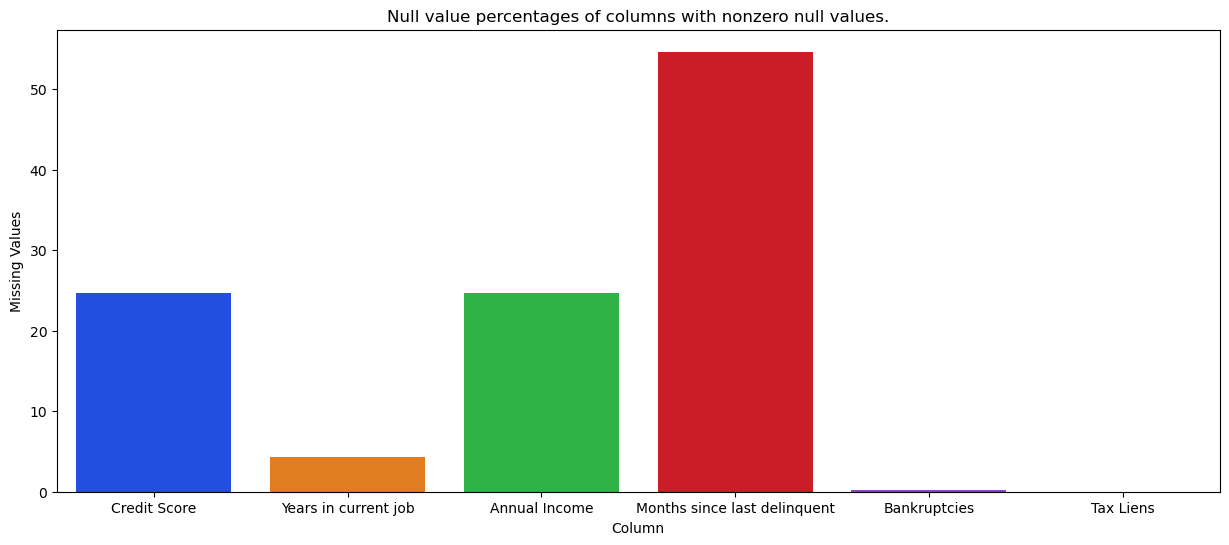

In [22]:
barplot_nulls(df, percentage=True)

In [23]:
del df['Months since last delinquent']

In [24]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10+ years,Home Mortgage,"33,694.00",Debt Consolidation,$584.03,12.30,10,0,6760,16056,0.00,0.00
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4 years,Home Mortgage,"42,269.00",other,"$1,106.04",26.30,17,0,6262,19149,0.00,0.00
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10+ years,Home Mortgage,"90,126.00",Debt Consolidation,"$1,321.85",28.80,5,0,20967,28335,0.00,0.00
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10+ years,Own Home,"38,072.00",Debt Consolidation,$751.92,26.20,9,0,22529,43915,0.00,0.00
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4 years,Rent,"50,025.00",Debt Consolidation,$355.18,11.50,12,0,17391,37081,0.00,0.00


See that the 'Months since last delinquent' column is gone now.

#### Filling the null values

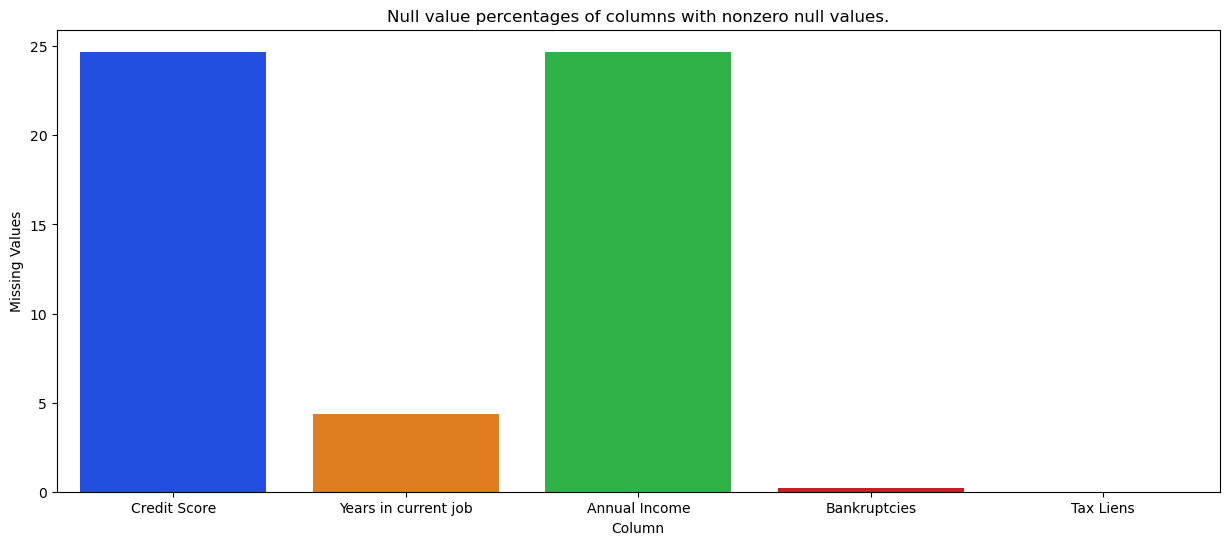

In [25]:
barplot_nulls(df, percentage=True)

Bankruptcies and Tax Liens have so few missing values.

##### Bankruptcies

In [26]:
df['Bankruptcies'].describe()

count             239,882.00
mean                    0.11
std                     0.34
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     7.00
Name: Bankruptcies, dtype: float64

The standard deviation is very low. We can simply fill with the mean.

In [27]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mean())

##### Tax Liens

In [28]:
df['Tax Liens'].describe()

count             240,351.00
mean                    0.03
std                     0.24
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                    11.00
Name: Tax Liens, dtype: float64

The standard deviation is low here as well. We can use the mean to fill empty values.

In [29]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mean())

##### Years in current job

In [30]:
df['Years in current job'].describe()

count        229930
unique           11
top       10+ years
freq          73965
Name: Years in current job, dtype: object

In [31]:
df['Years in current job'].mode()

0    10+ years
Name: Years in current job, dtype: object

Since this column consists of categorical values, we cannot simply fill it with the mean value. We can see from above graph that '10+ years' is the overwhelming majority, and given the null values are less than 5% it is safe to use that to fill.

In [32]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].value_counts().idxmax())

##### Checking the graph again

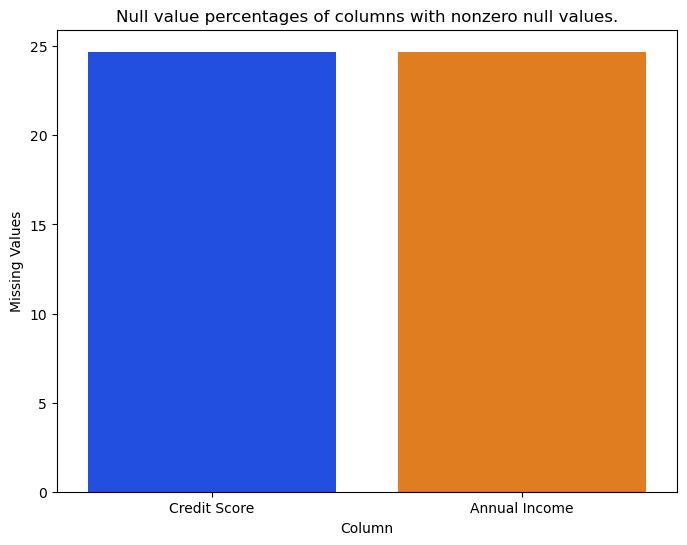

In [33]:
barplot_nulls(df, percentage=True, figsize=(8, 6))

##### Credit Score

In [34]:
df['Credit Score'].describe()

count             181,028.00
mean                1,236.27
std                 1,737.77
min                   585.00
25%                   715.00
50%                   734.00
75%                   744.00
max                 7,510.00
Name: Credit Score, dtype: float64

###### Check for outliers using a boxplot

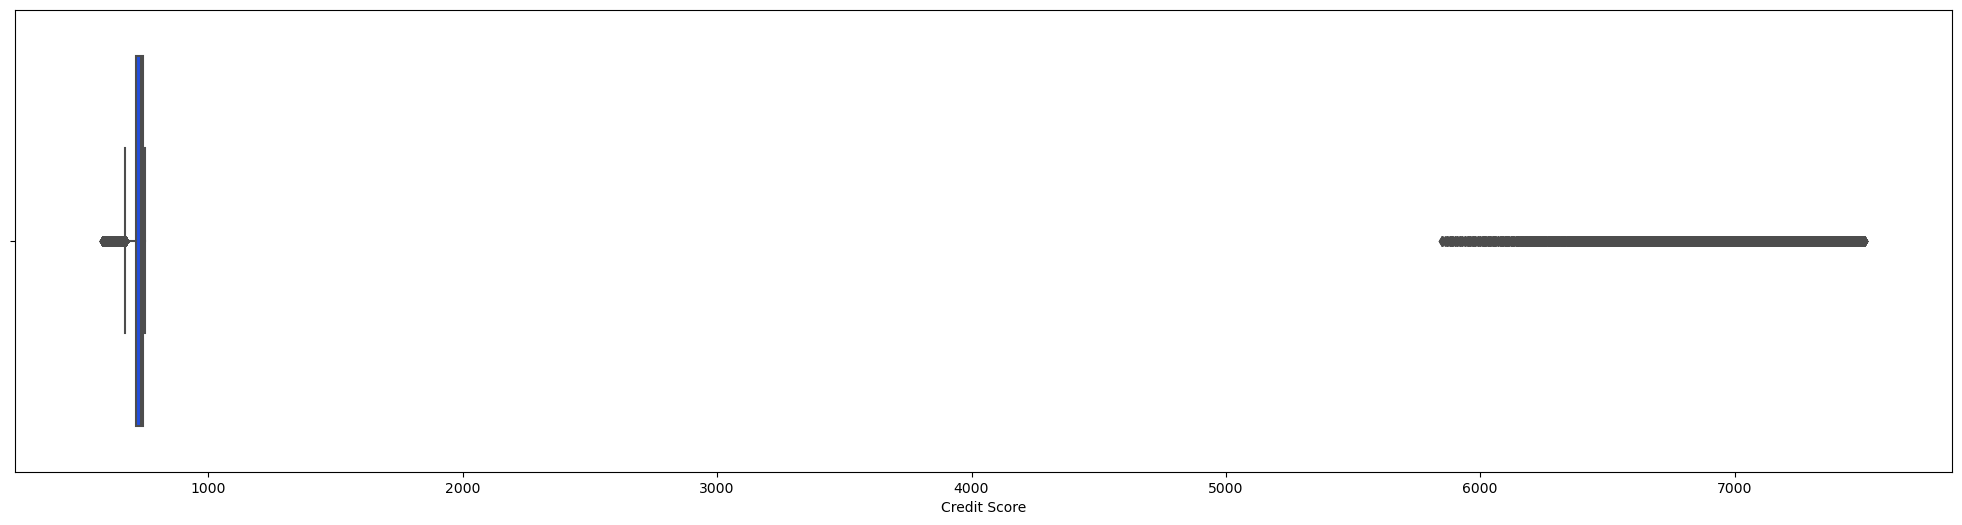

In [35]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df['Credit Score'], palette='bright');

The data has many outliers. We cannot use the mean to fill it.

In [36]:
df['Credit Score'].interpolate(method='linear', inplace=True)

##### Annual Income

In [37]:
df['Annual Income'].describe()

count             181,028.00
mean               72,400.27
std                56,468.08
min                     0.00
25%                44,555.00
50%                61,505.00
75%                87,057.00
max             8,713,547.00
Name: Annual Income, dtype: float64

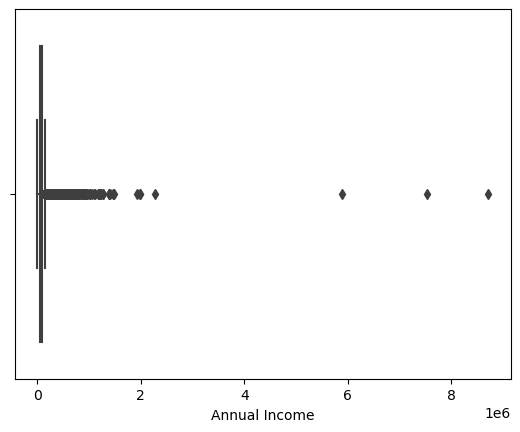

In [38]:
sns.boxplot(x=df['Annual Income']);

Once again the data has many outliers.

In [39]:
df['Annual Income'].interpolate(method='linear', inplace=True)

In [40]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

No null values!

### Transforming categorical data into numeric

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    240374 non-null  object 
 1   Customer ID                240374 non-null  object 
 2   Loan Status                240374 non-null  object 
 3   Current Loan Amount        240374 non-null  int64  
 4   Term                       240374 non-null  object 
 5   Credit Score               240374 non-null  float64
 6   Years in current job       240374 non-null  object 
 7   Home Ownership             240374 non-null  object 
 8   Annual Income              240374 non-null  float64
 9   Purpose                    240374 non-null  object 
 10  Monthly Debt               240374 non-null  object 
 11  Years of Credit History    240374 non-null  float64
 12  Number of Open Accounts    240374 non-null  int64  
 13  Number of Credit Problems  240374 

#### Years in current job

In [42]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', '3 years', '2 years',
       '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [43]:
new_data = {
    '10+ years': 10.0,
    '4 years': 4.0,
    '6 years': 6.0,
    '5 years': 5.0,
    '3 years': 3.0,
    '2 years': 2.0,
    '< 1 year': 0.5,
    '1 year': 1.0,
    '7 years': 7.0,
    '9 years': 9.0,
    '8 years': 8.0
}

In [44]:
df['Years in current job'] = df['Years in current job'].map(new_data)

In [45]:
df['Years in current job'].describe()

count             240,374.00
mean                    6.09
std                     3.58
min                     0.50
25%                     3.00
50%                     6.00
75%                    10.00
max                    10.00
Name: Years in current job, dtype: float64

#### Loan status

In [46]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [47]:
new_data = {
    'Fully Paid': 1,
    'Charged Off': 0
}

In [48]:
df['Loan Status'] = df['Loan Status'].map(new_data)

In [49]:
df['Loan Status'].describe()

count             240,374.00
mean                    0.73
std                     0.44
min                     0.00
25%                     0.00
50%                     1.00
75%                     1.00
max                     1.00
Name: Loan Status, dtype: float64

#### Term

In [50]:
df['Term'].sample(5)

239384    Short Term
97181      Long Term
225419     Long Term
100177    Short Term
150077     Long Term
Name: Term, dtype: object

In [51]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

The term is not a hierarchial data, so instead of assigning short term 0 and long term 1, we will do get_dummies().

#### Purpose

In [52]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

There are two kinds of 'Other' in this data. We must fix this.

In [53]:
df.loc[df['Purpose'] == 'other', 'Purpose'] = 'Other'

In [54]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    240374 non-null  object 
 1   Customer ID                240374 non-null  object 
 2   Loan Status                240374 non-null  int64  
 3   Current Loan Amount        240374 non-null  int64  
 4   Term                       240374 non-null  object 
 5   Credit Score               240374 non-null  float64
 6   Years in current job       240374 non-null  float64
 7   Home Ownership             240374 non-null  object 
 8   Annual Income              240374 non-null  float64
 9   Purpose                    240374 non-null  object 
 10  Monthly Debt               240374 non-null  object 
 11  Years of Credit History    240374 non-null  float64
 12  Number of Open Accounts    240374 non-null  int64  
 13  Number of Credit Problems  240374 

#### Home Ownership

In [56]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

This column will also be left to get_dummies()

In [57]:
[col for col in df.columns if df[col].dtype == 'object']

['Loan ID',
 'Customer ID',
 'Term',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Maximum Open Credit']

#### Monthly Debt

In [58]:
df['Monthly Debt'].unique()

array(['$584.03', '$1,106.04 ', '$1,321.85 ', ..., '$707.08', '$47.11',
       '$2,525.82 '], dtype=object)

It appears these are all numbers prefixed with $ sign. We will remove it, as well ass the commas to separate the digits and convert them to float.

In [59]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '')
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '')
df['Monthly Debt'] = df['Monthly Debt'].astype('float32')
df['Monthly Debt'].unique()

array([ 584.03, 1106.04, 1321.85, ...,  707.08,   47.11, 2525.82],
      dtype=float32)

#### Purpose

This column will also be left to get_dummies

#### Maximum Open Credit

In [60]:
df['Maximum Open Credit'].unique()

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

This column consists of numeric values. We can just convert them.

In [61]:
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')
df['Maximum Open Credit'].isnull().sum()

4

We converted these values to numeric, and the ones that could not be converted were set to NaN. There are only 4 of these, so we can fill them with the median value.

In [62]:
median = df['Maximum Open Credit'].median()
df['Maximum Open Credit'].fillna(median, inplace=True)
df['Maximum Open Credit'].isnull().sum()

0

## Modelling

### Dummy variables

In [63]:
[col for col in df.columns if df[col].dtype == 'object']

['Loan ID', 'Customer ID', 'Term', 'Home Ownership', 'Purpose']

In [64]:
ids = df[['Loan ID', 'Customer ID']]
df = df.drop(['Loan ID', 'Customer ID'], axis=1)

In [65]:
df = pd.get_dummies(df, drop_first=True)

In [66]:
corr = df.corr(numeric_only=True)

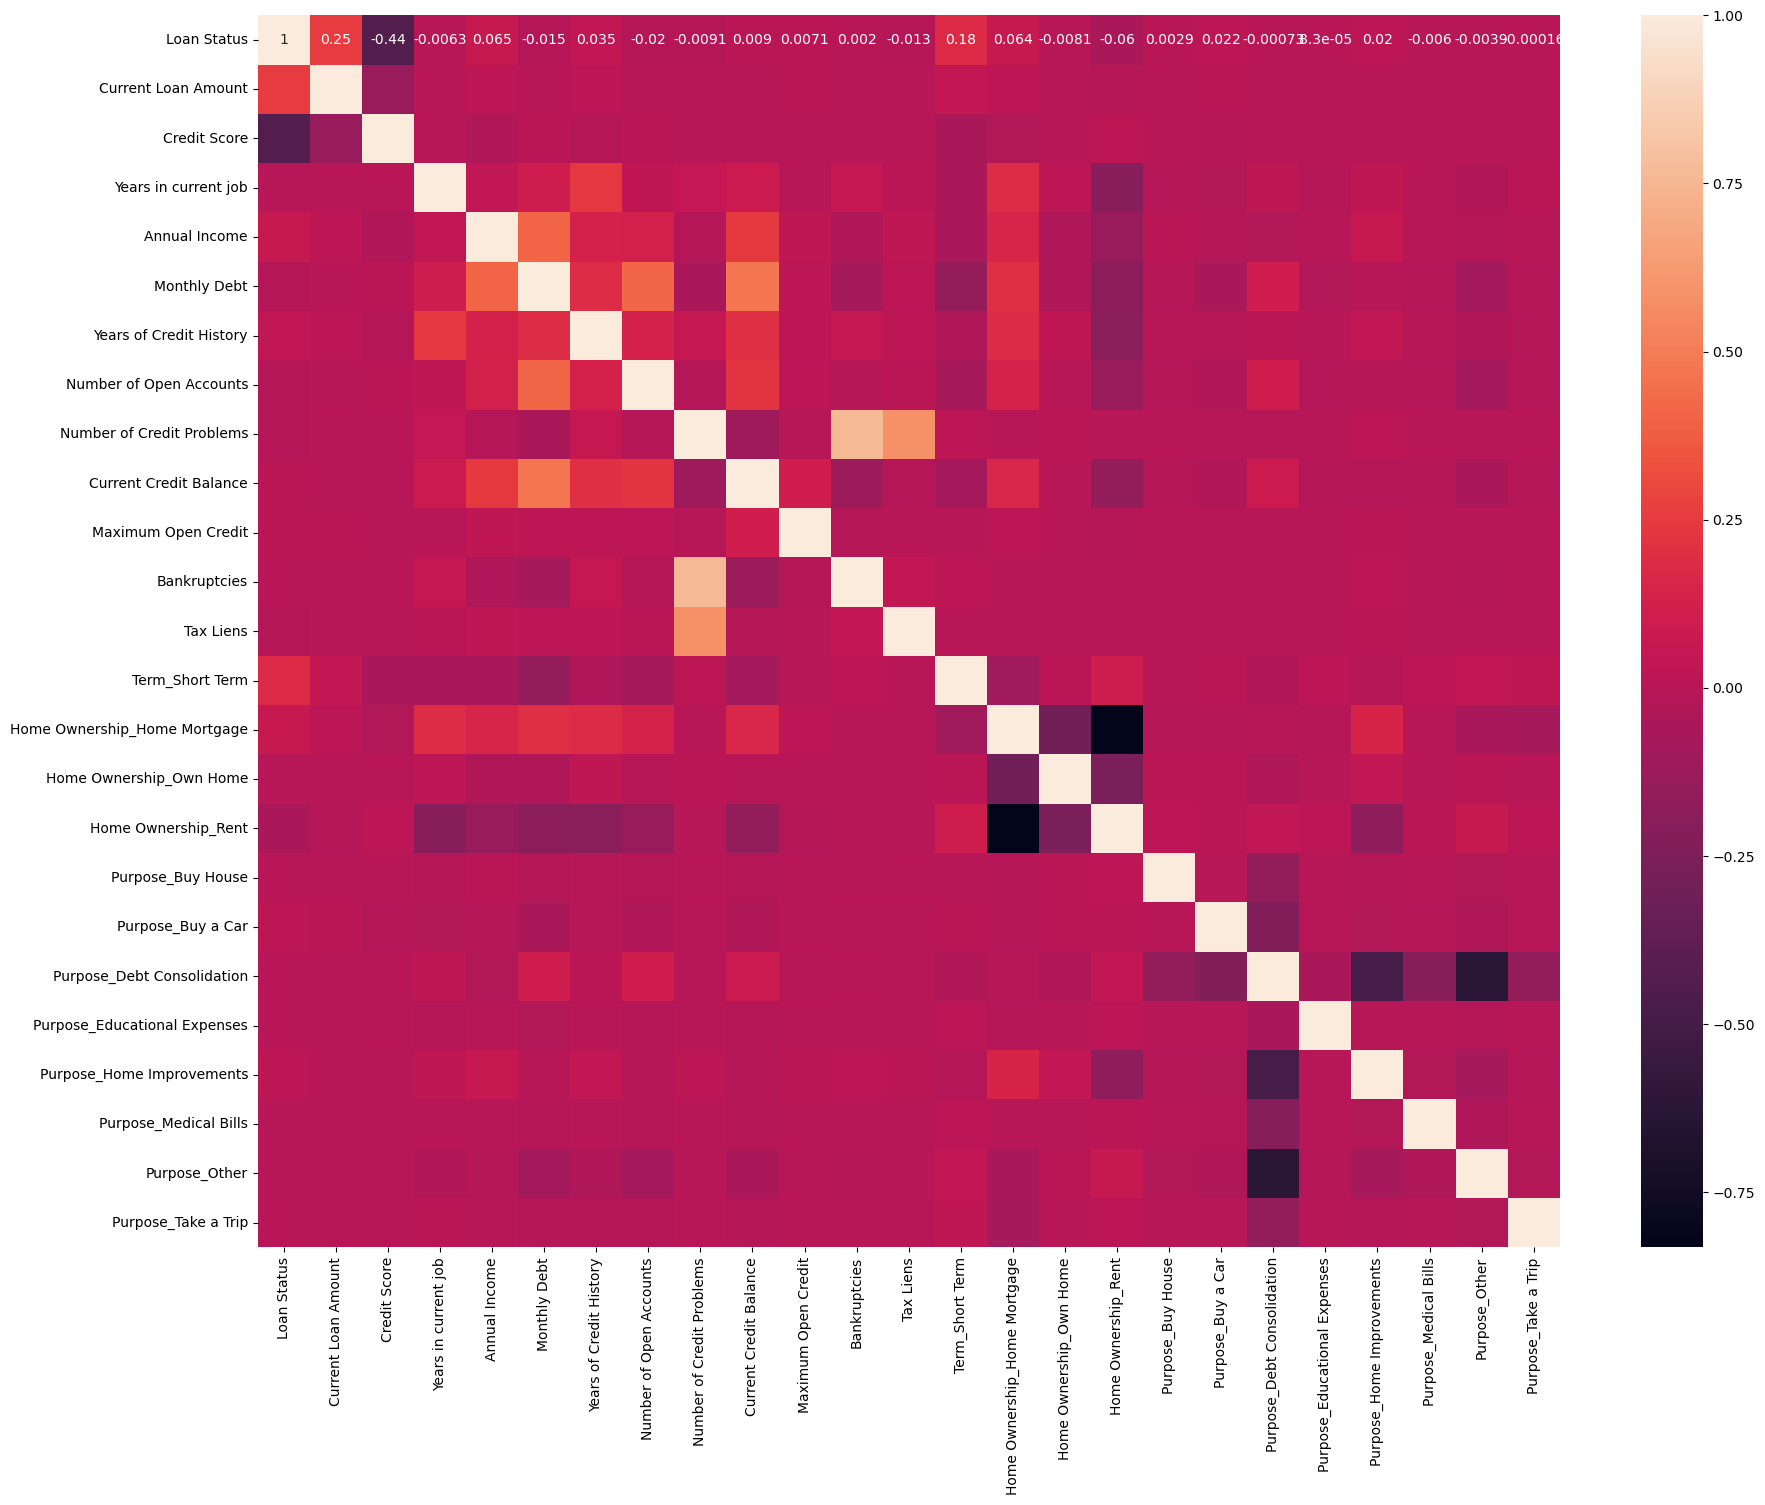

In [67]:
plt.figure(figsize=(21, 16))
sns.heatmap(corr, annot=True);

In [68]:
abs(corr['Credit Score'].sort_values(ascending=True))

Loan Status                                    0.44
Current Loan Amount                            0.13
Term_Short Term                                0.06
Annual Income                                  0.04
Home Ownership_Home Mortgage                   0.03
Years of Credit History                        0.01
Purpose_Buy a Car                              0.01
Purpose_Home Improvements                      0.01
Maximum Open Credit                            0.00
Current Credit Balance                         0.00
Purpose_Take a Trip                            0.00
Bankruptcies                                   0.00
Purpose_Other                                  0.00
Purpose_Educational Expenses                   0.00
Purpose_Buy House                              0.00
Number of Credit Problems                      0.00
Home Ownership_Own Home                        0.00
Purpose_Debt Consolidation                     0.00
Purpose_Medical Bills                          0.00
Years in cur

From this correlation we can see that **Current Loan Amount** affects Credit Score the most. We will ask each customer of this bank to tell us about their current loan amount, and we will consider giving the loan based on the answer. We will derive the 'Loan OK' column from this column.

In [69]:
df['Current Loan Amount'].describe()

count             240,374.00
mean           14,659,881.83
std            35,353,839.17
min                   505.00
25%                 8,300.25
50%                14,394.00
75%                24,566.00
max            99,999,999.00
Name: Current Loan Amount, dtype: float64

In [70]:
df['Current Loan Amount'].median()

14394.0

In [71]:
df['Current Loan Amount'].median() / df['Current Loan Amount'].mean()

0.0009818633033268711

In [72]:
df['Current Loan Amount'] / df['Credit Score']

0                       15.55
1                        4.69
2                       28.15
3                       25.09
4                       15.73
                 ...         
256979                   5.38
256980                   6.89
256981                   1.62
256982                  16.24
256983                  41.15
Length: 240374, dtype: float64

According to [this website](https://www.nerdwallet.com/article/finance/780-credit-score-good-bad), a credit score of **720** is considered excellent.

In [73]:
df[df['Credit Score'] >= 720]['Current Loan Amount'].describe()

count             169,325.00
mean           15,075,217.65
std            35,765,046.77
min                   505.00
25%                 8,084.00
50%                13,608.00
75%                23,890.00
max            99,999,999.00
Name: Current Loan Amount, dtype: float64

In [74]:
df[df['Credit Score'] >= 720]['Current Loan Amount'].median()

13608.0

- Those with a greater current loan than the median current loan amount of people with 720 credit score will be marked not eligible.
- Those with less current loan than the median current loan amount of people with 720 credit score will be marked eligible.

In [75]:
from numpy import where

target = df[df['Credit Score'] >= 720]['Current Loan Amount'].median()
target += target * 0.1 # Add a 10% buffer
df['Loan OK'] = where(df['Current Loan Amount'] <= target, 1, 0)
df.sample(10)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Loan OK
238770,1,3012,741.00,10.00,"67,275.00",711.99,17.50,10,0,23331,...,False,False,False,True,False,False,False,False,False,1
57847,1,10946,738.50,0.50,"82,990.00",809.34,26.10,13,0,12694,...,True,False,False,True,False,False,False,False,False,1
185693,1,99999999,745.00,10.00,"74,603.00",920.10,28.40,7,0,10548,...,False,False,False,True,False,False,False,False,False,0
122656,1,99999999,719.00,9.00,"45,153.00",861.67,16.70,12,0,28530,...,False,False,False,False,False,False,False,True,False,0
153639,1,14900,744.00,0.50,"170,400.00","1,017.80",15.60,16,0,18309,...,True,False,False,True,False,False,False,False,False,1
167292,1,99999999,750.00,5.00,"48,079.00",234.39,17.50,9,0,9883,...,False,False,True,False,False,False,False,False,False,0
169064,1,2501,740.00,3.00,"64,032.00",749.17,12.70,7,0,3169,...,True,False,False,True,False,False,False,False,False,1
237343,0,5866,750.00,1.00,"50,570.00","1,466.53",11.60,12,0,4133,...,True,False,False,False,False,False,False,False,False,1
138006,0,9684,"7,070.00",0.50,"72,626.00",124.07,11.60,8,0,1878,...,True,False,False,True,False,False,False,False,False,1
59754,1,28036,738.00,10.00,"120,156.00","1,320.71",27.00,9,0,12039,...,False,False,False,True,False,False,False,False,False,0


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score

In [77]:
def test_model(x, y, alg):
    x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)
    model = alg.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, pred)
    cmatrix = confusion_matrix(y_test, pred)

    name = str(model)[:-2]
    print(f'Accuracy score of {name}: {acc:.2f}')
    plt.title(f'Confusion  Matrix for {name}')
    sns.heatmap(cmatrix, annot=True)

In [78]:
x = df.drop(['Loan OK', 'Credit Score'], axis=1) # Remove credit score as well since Loan OK was derived from it anyway.
y = df['Loan OK']

Accuracy score of GradientBoostingClassifier: 1.00


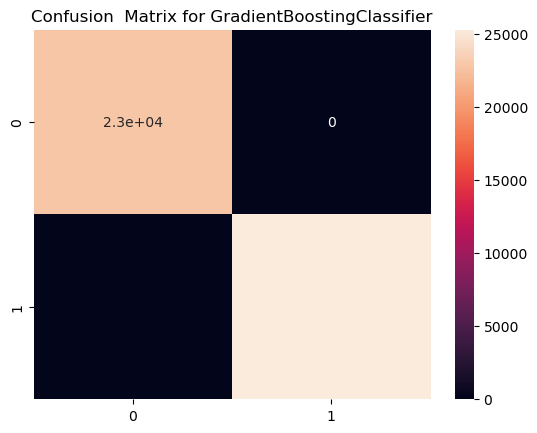

In [79]:
test_model(x, y, GradientBoostingClassifier())

Accuracy score of LogisticRegression: 0.88


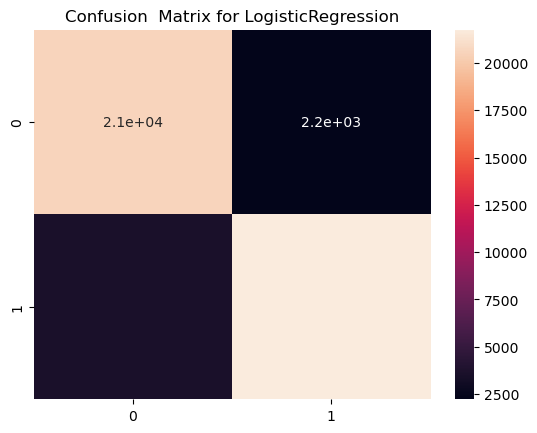

In [80]:
test_model(x, y, LogisticRegression())

Accuracy score of DecisionTreeClassifier: 1.00


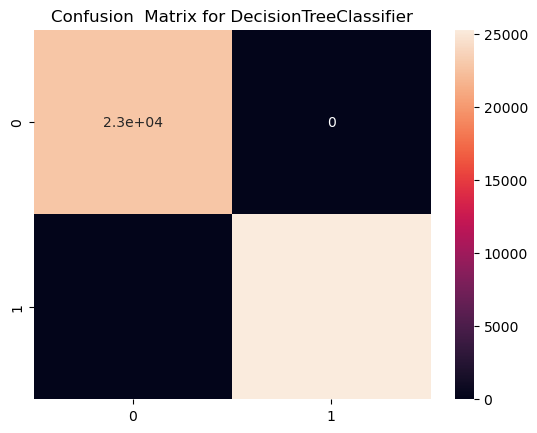

In [81]:
test_model(x, y, DecisionTreeClassifier())

Accuracy score of GaussianNB: 0.76


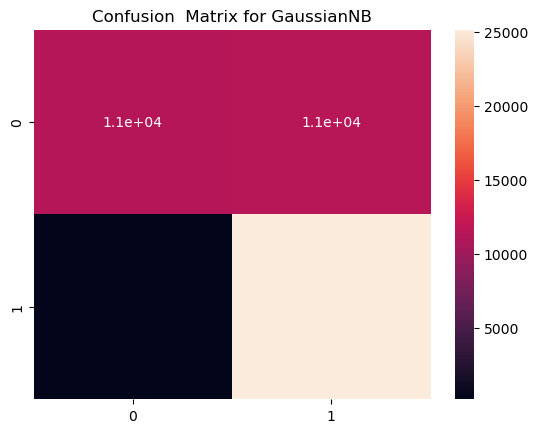

In [82]:
test_model(x, y, GaussianNB())

Accuracy score of MultinomialNB: 0.67


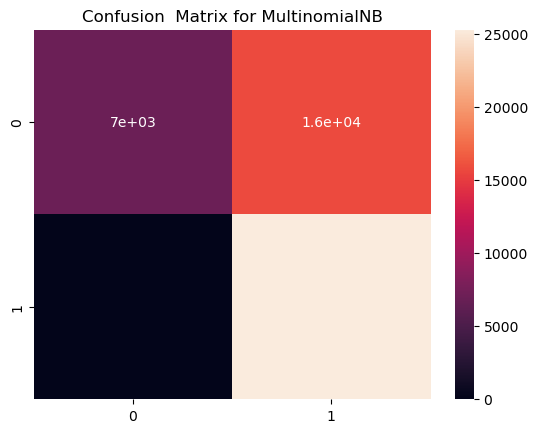

In [83]:
test_model(x, y, MultinomialNB())

## Conclusion

In this project I worked with the bank customer data and came up with a way to determine weather to give a customer a loan or not. I decided to ask the customers how much do they currenyly owe in loan currently. This decision was made because I saw that **Current Loan Amount** had the highest correlation with the credit score, which is the metric used in this scenario. I saw that a credit score of at least 720 is desired to give a loan, so I decided to set my target current loan amount to the median of those who with at leas 720 creadit score. Using this, I created a new column 'Loan OK' and placed 1 or 0 into this column based on the Current Loan Amount of each customer, and then I used various classification methods to predict the values in this column. I saw that DecisionTreeClassifier and GradientBoostingClassifier have an accuracy score of 1.0, which I believe indicates overfitting, whereas the other models had more regular accuracy scores. The best performing model was **LogisticRegression**, with an accuracy score of 20%. With further optimizations the scores could be better.